In [26]:
import numpy as np
import matplotlib.pyplot as plt

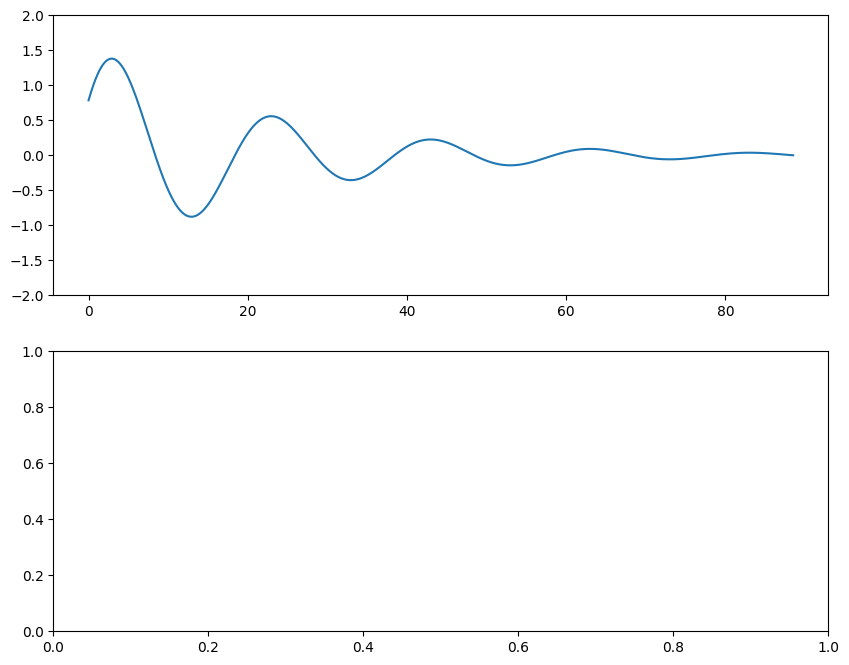

In [27]:
# Moment of Inertia
I = 1000

# FSFB GAINS
k1 = 10
k2 = 0.01
K = np.array([-k1, -k2])

# INITIAL CONDITION
theta_0 = np.pi/4 # rad
omega_0 = np.pi/8 # rad/sec

# define / initialize error
err = abs(theta_0) + abs(omega_0)

# initialize time and interval tracker
t = np.array([0])
dt = 0.1
i = 0

# initialize the states
theta = np.array([theta_0])
omega = np.array([omega_0])

while  err > 0.01:

    # calculate next state
    next_theta = theta[i] + omega[i]*dt
    next_omega = omega[i] + (-k1/I*theta[i] -k2*omega[i])

    # add next state to array
    theta = np.append(theta, next_theta)
    omega = np.append(omega, next_omega)

    err = abs(theta[i]) + abs(omega[i])
    
    # next interval (i=0 is initial condition)
    t = np.append(t, t[i]+dt)
    i += 1

    if t[i] > 1000:
        print("It took too long!")
        break

fig, ax = plt.subplots(2, 1, figsize=[10,8])

ax[0].set_ylim([-2, 2])
ax[0].plot(t, theta)

In [28]:
# System dynamics / How the states affect eachother

A = np.array([  [0, dt],
                [0, 0]
            ])

# Effect of controller input (u) on states
B = np.array([  [0],
                [dt/I]
            ])